In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Path to sqlite
hawaii_database_path = "sqlit:///../Resources/hawaii.sqlite"

In [5]:
f"sqlite:///{hawaii_database_path}"

'sqlite:///sqlit:///../Resources/hawaii.sqlite'

In [6]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{hawaii_database_path}")
conn = engine.connect()

In [7]:
# reflect the tables
engine.table_names()

['measurement', 'station']

In [8]:
hawaii_measurement = pd.read_sql("SELECT * FROM measurement", conn)
hawaii_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [9]:
hawaii_station = pd.read_sql("SELECT * FROM station", conn)
hawaii_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [10]:
# reflect an existing database into a new model


In [11]:
# View all of the classes that automap found
Base = automap_base()
Base


sqlalchemy.ext.automap.Base

In [12]:
Base.prepare(engine,reflect=True)

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB

from sqlalchemy.orm import Session
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
curr_date = session.query(func.max(Measurement.date)).first()
# SELECT max(date) FROM Measurement
curr_date

('2017-08-23')

Text(0.5, 1.0, 'Precipitation Scores')

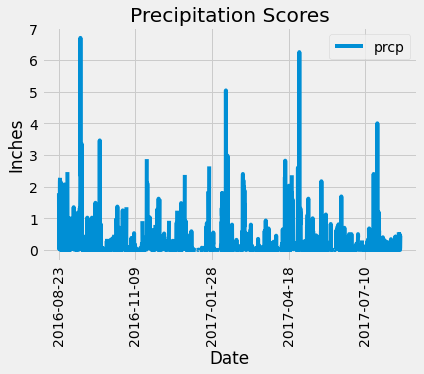

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
# last_year

# Perform a query to retrieve the date and precipitation scores
# SELECT date, prcp FROM Measurement WHERE date >= last_year
precp_score = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= last_year).all()
#precp_score

# Save the query results as a Pandas DataFrame and set the index to the date column
date_df = pd.DataFrame(precp_score)
#date_df

# Sort the dataframe by date
sort_df = date_df.sort_values(["date"])
# sort_df

# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot(x = "date", y = "prcp", rot=90)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.title("Precipitation Scores")

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
# SELECT count(stations) FROM Station
total_stations = session.query(func.count(Station.station)).all()
# total_stations
print(f"The total number of stations is {total_stations}.")

The total number of stations is [(9,)].


In [19]:
#from sqlalchemy import desc

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# SELECT COUNT(station) FROM Station GROUP BY station ORDER BY COUNT(station) DESC
active_list = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_list
# for station in active_list:
# print(f'Station: {station[0]} / Rows: {station[1]}')

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
print(f'The most active station is {active_list[0][0]} with {active_list[0][1]} rows.')

In [23]:
# Using the most active station id from the previous query, calculate the lowest, \
# highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f"The lowest temp of the most active station (USC00519281) is{min_temp}.")
print(f"The highest temp of the most active station (USC00519281)is{max_temp}.")
print(f"The average temp of the most active station (USC00519281) is{avg_temp}.")

The lowest temp of the most active station (USC00519281) is[(54.0,)].
The highest temp of the most active station (USC00519281)is[(85.0,)].
The average temp of the most active station (USC00519281) is[(71.66378066378067,)].


In [ ]:
# Calculate the date one year from the last date in data set.
#prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)
#prev_year

Text(0.5, 1.0, 'Most Active Temp - 8/23/16 - 8/23/17')

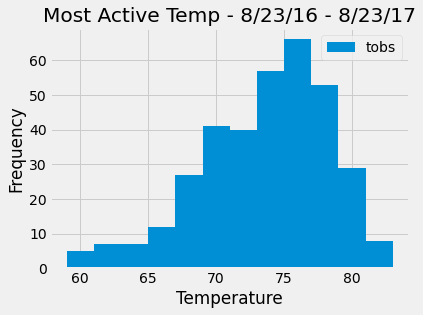

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_year).all()

# Creat the dataframe
df = pd.DataFrame(results, columns=['tobs'])


# Use Pandas Plotting with Matplotlib to plot the data
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.title("Most Active Temp - 8/23/16 - 8/23/17")

# Close session

In [25]:
# Close Session
session.close()